### Proyecto modelación y simulación  

1. Javier Mombiela 20067
2. Pablo Gonzalez 20362
3. Jose Hernandez 20053
4. Javier Valle   20159

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load de la data

In [2]:
data = pd.read_csv('./data/houses_to_rent_v2.csv')

In [3]:
data.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


#### Valores nulos

In [4]:
valores_faltantes_por_columna = data.isna().sum()
valores_faltantes_por_columna

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

#### Shape del dataset

In [5]:
print("Shape del DataFrame es %s filas, %s columnas"%data.shape)

Shape del DataFrame es 10692 filas, 13 columnas


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


#### Describe valores numericos

In [7]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


#### Describe valores numericos

In [8]:
data.select_dtypes(include=['object']).describe()

,city,floor,animal,furniture
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


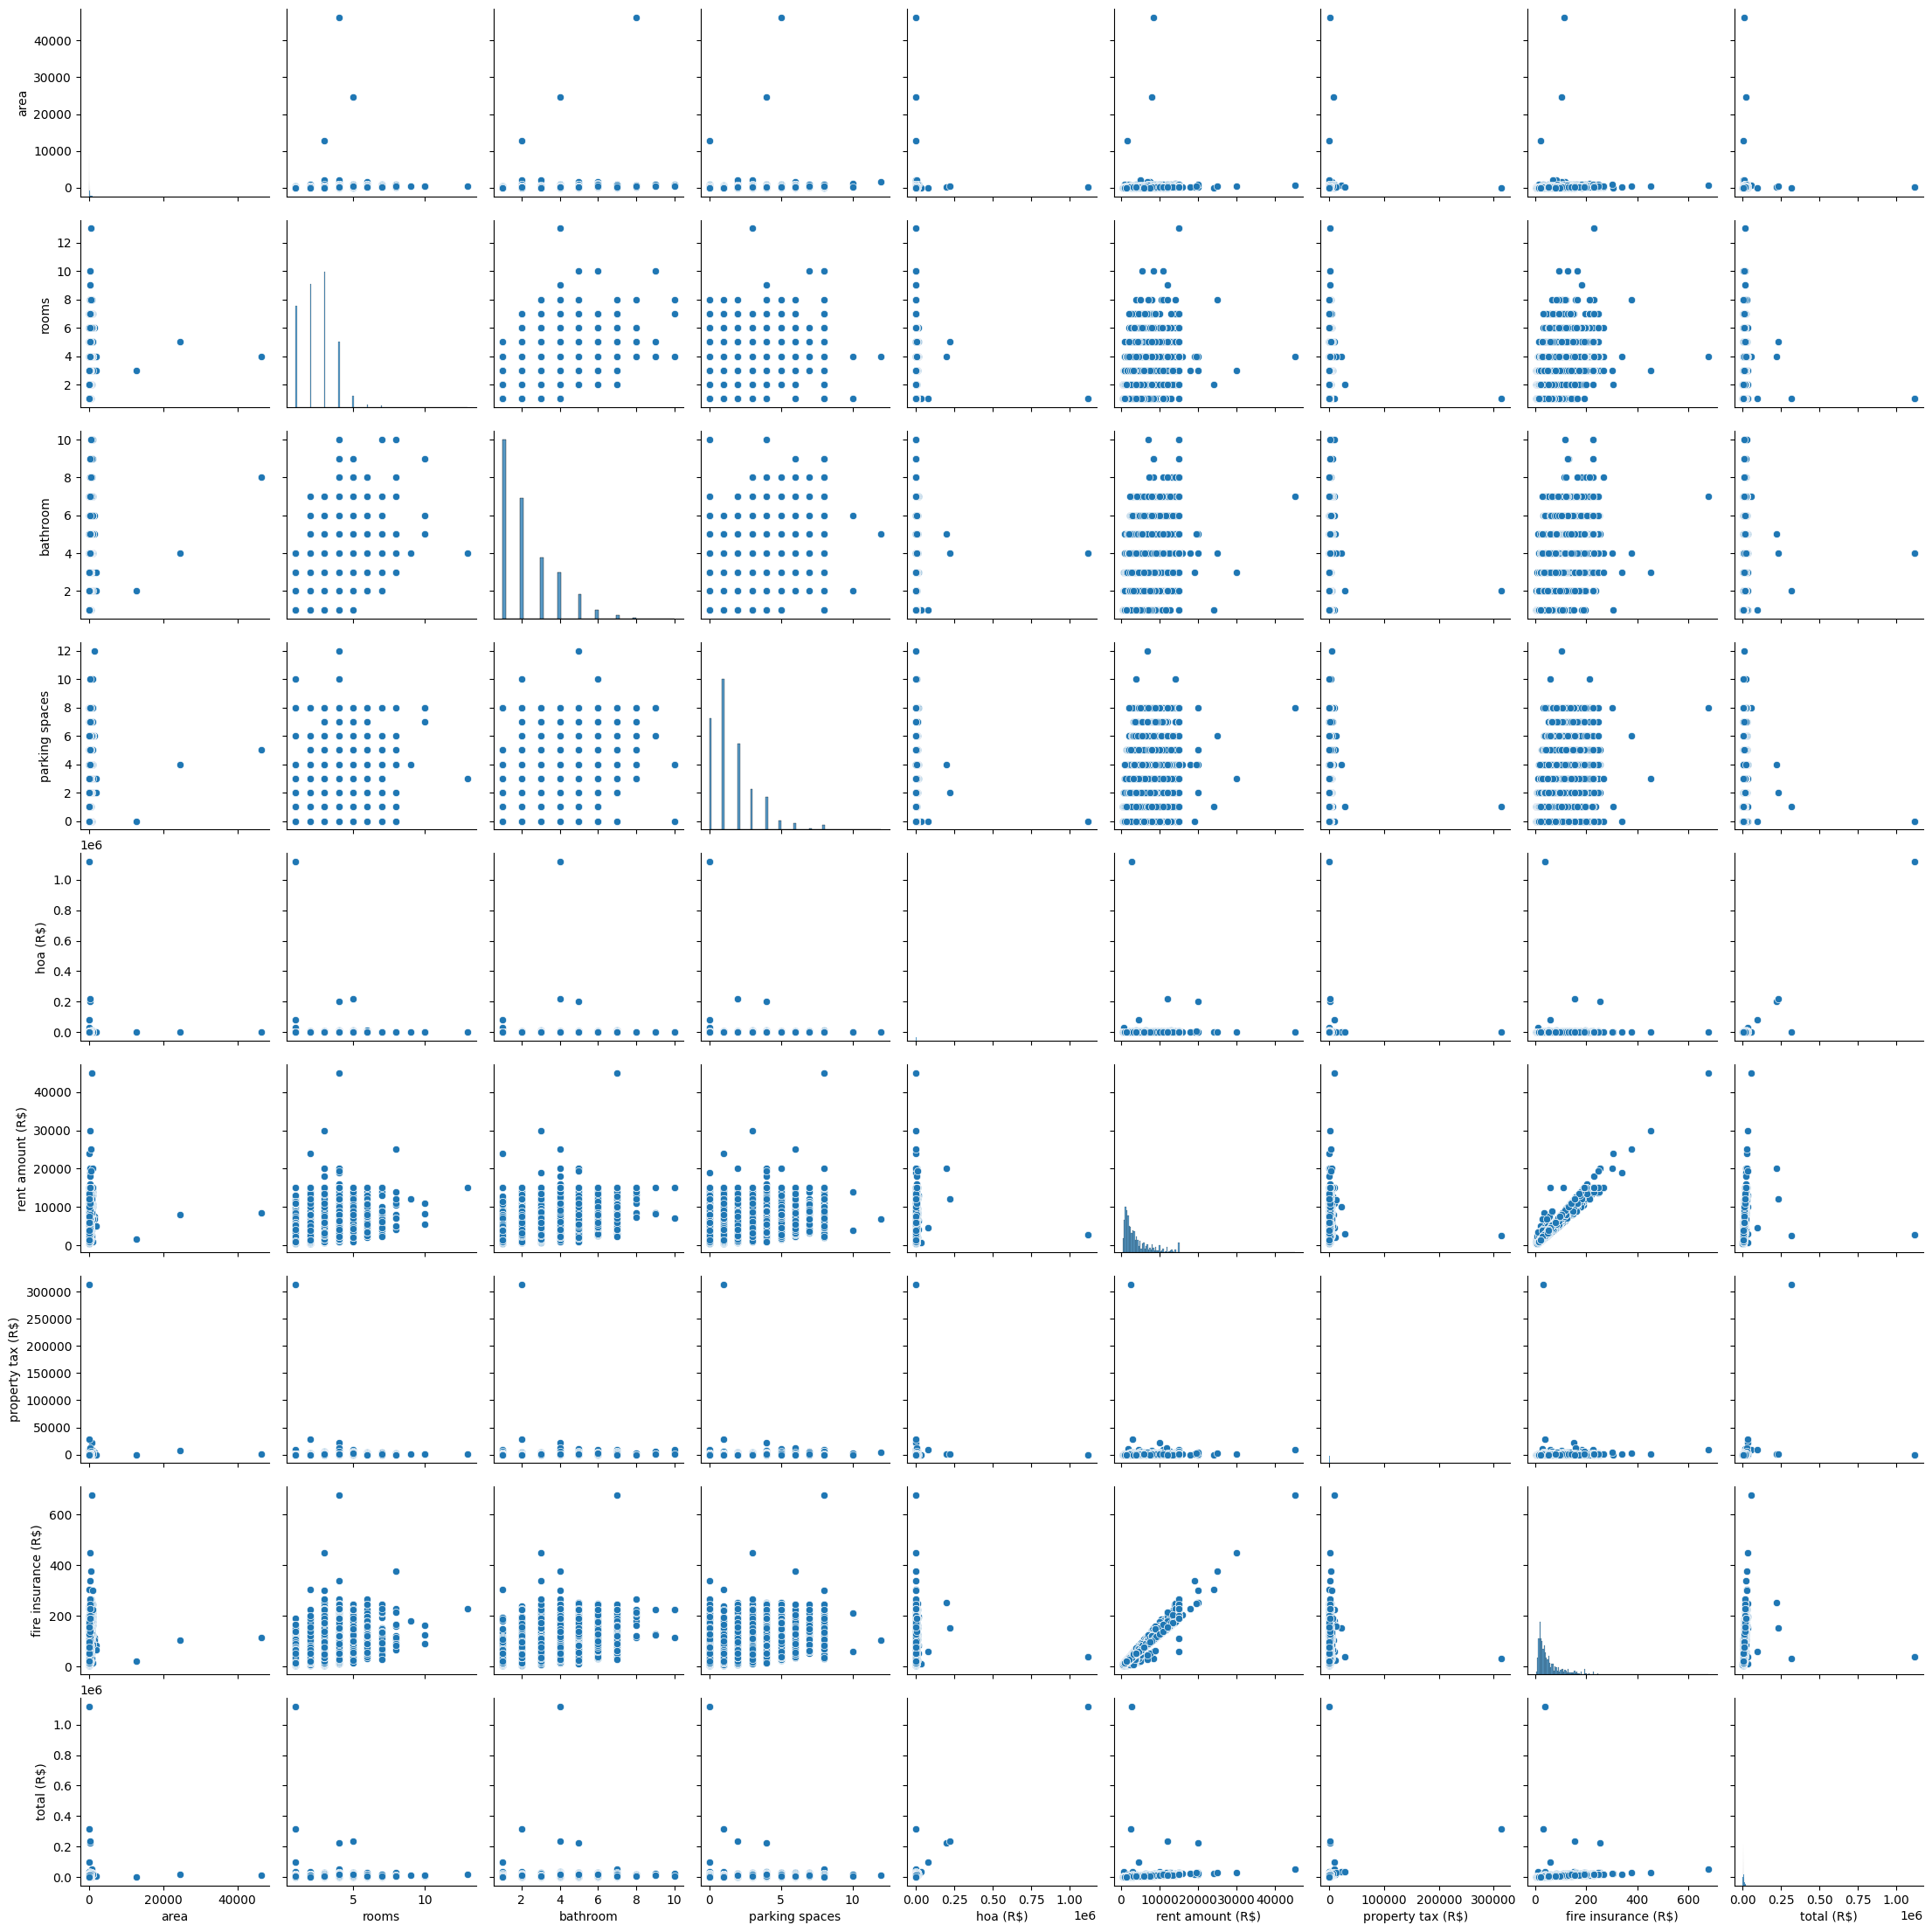

In [29]:
sns.pairplot(data)

### Analisis de puntos atipicos

In [9]:
for col in data.columns:
    if 'float' in str(data[col].dtype) or 'int' in str(data[col].dtype) and col not in ['bathroom', 'rooms', 'parking spaces']:
        data = data[ data[col] < data[col].mean()+data[col].std()*4 ]

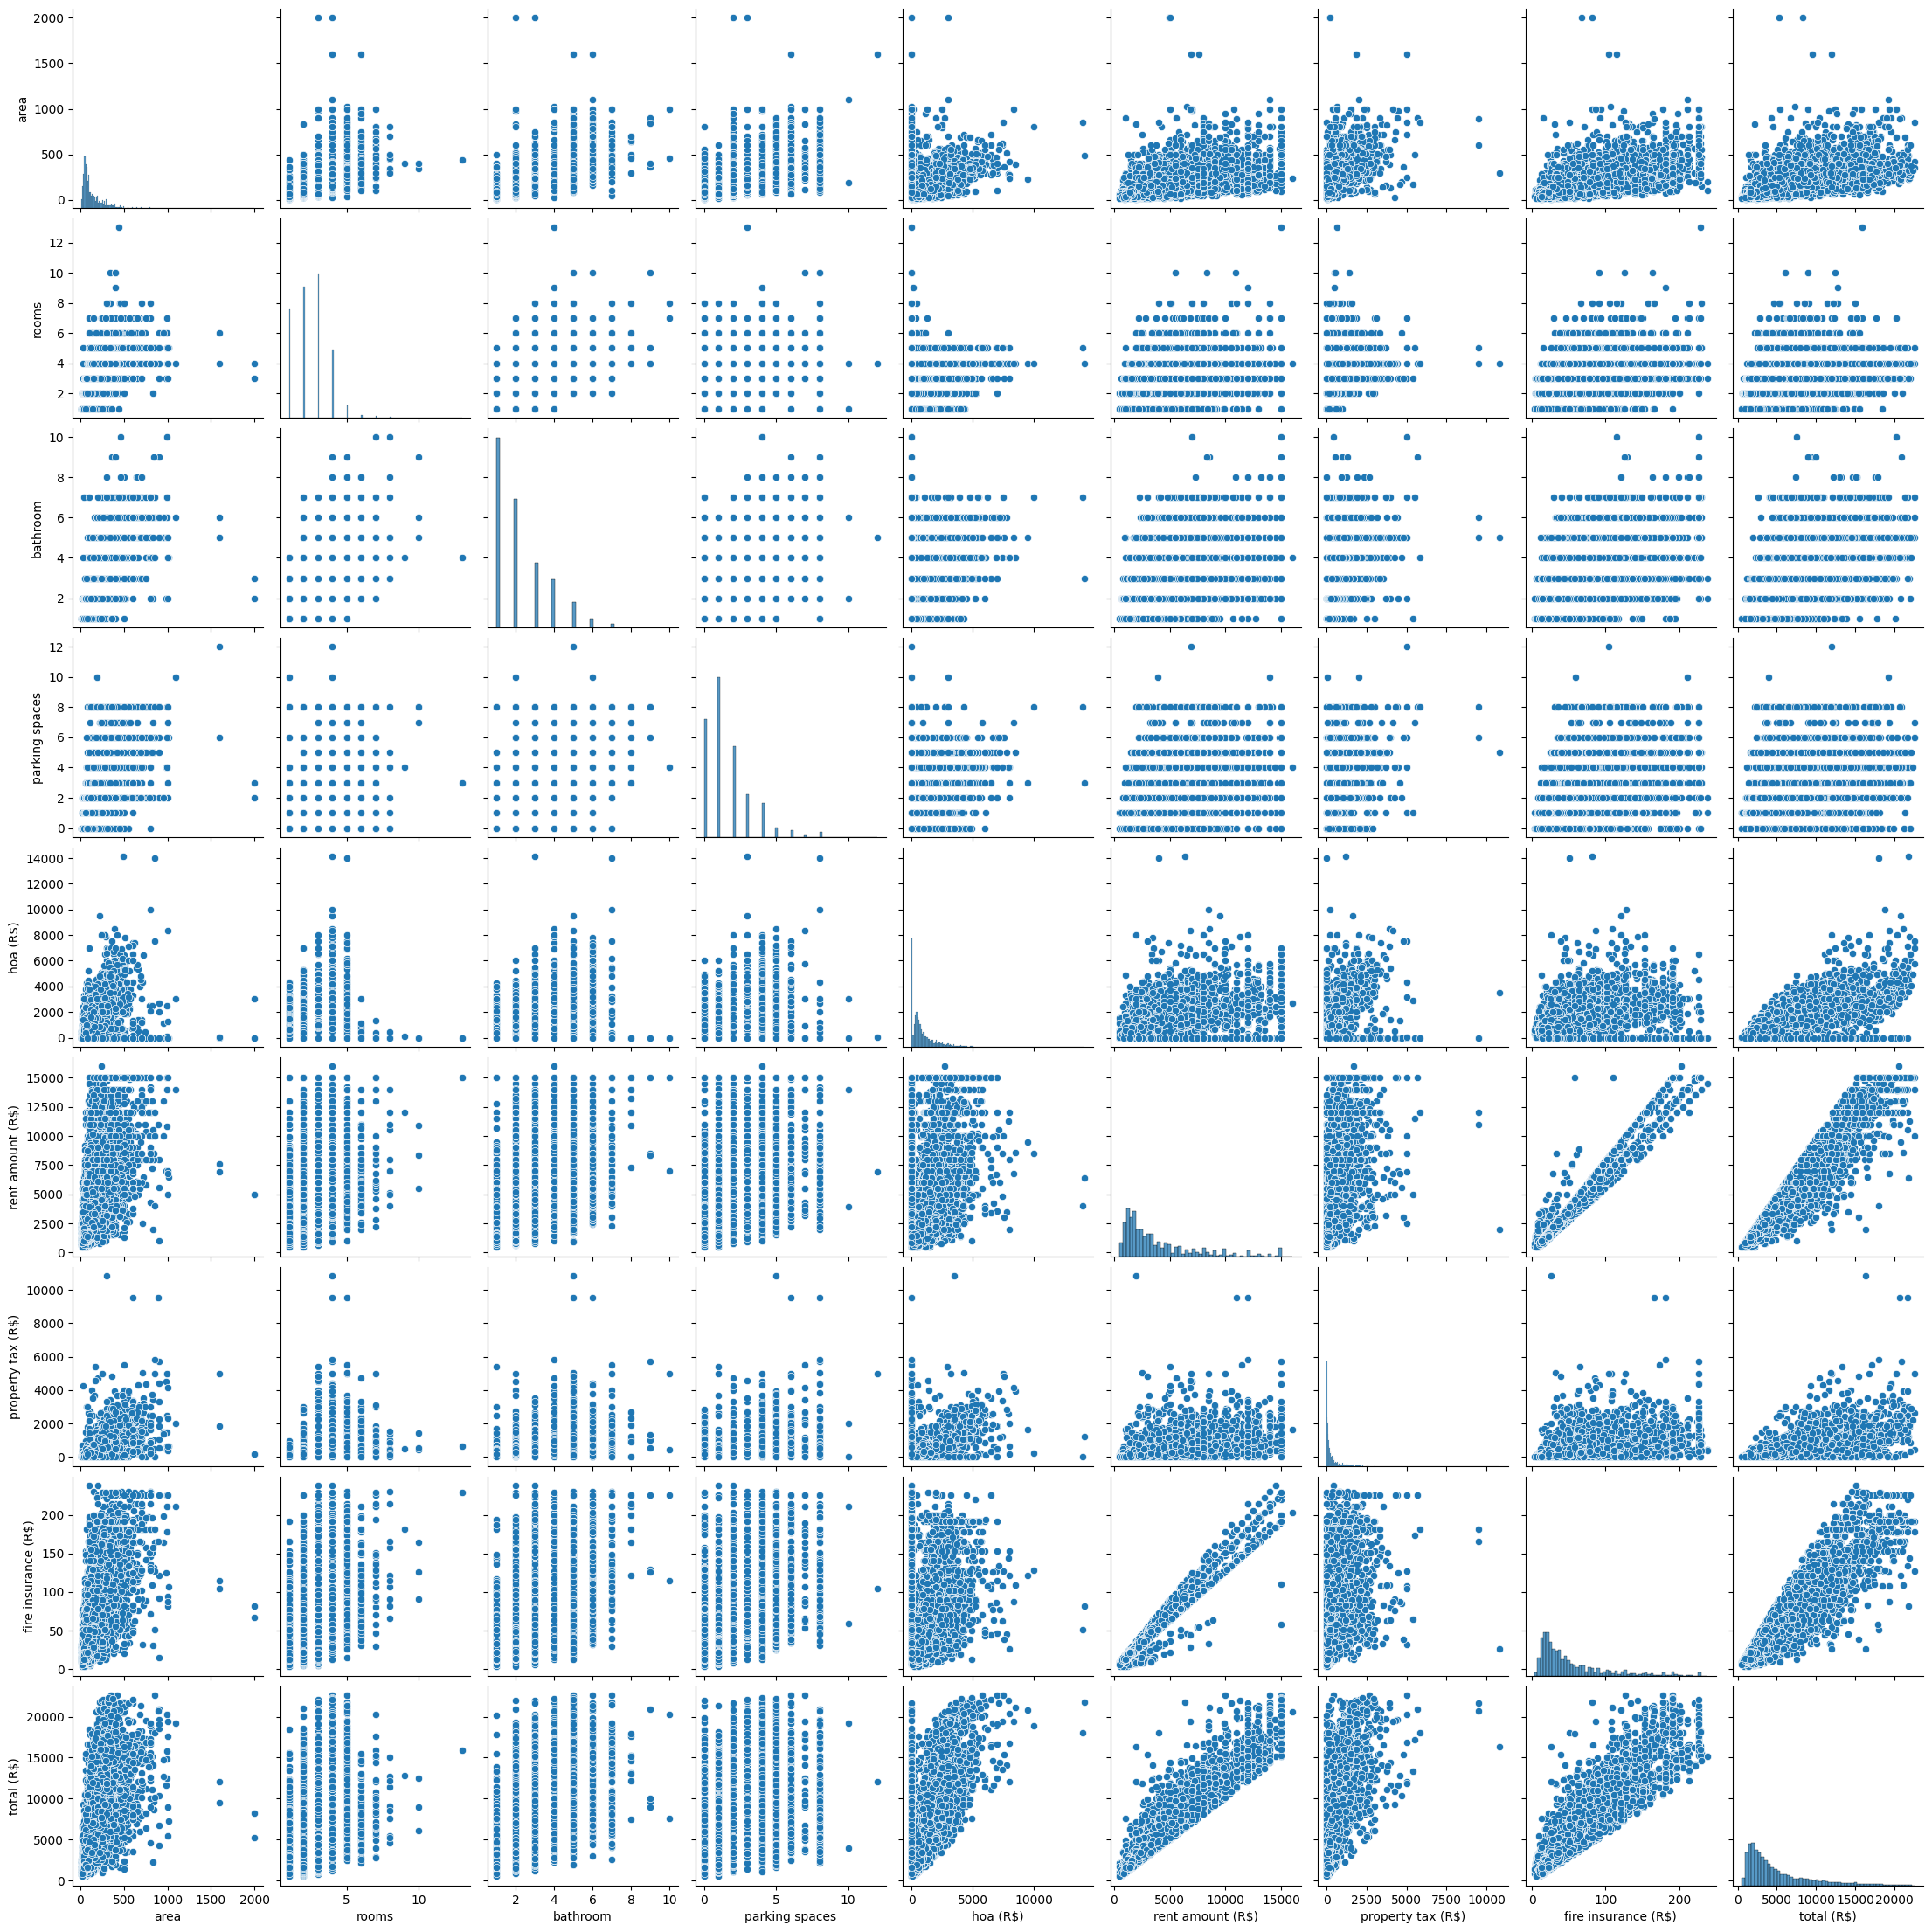

In [32]:
sns.pairplot(data)

Como se puede visualizar ahora las graficas ya no presentan puntos atipicos por lo que los datos estan mas juntos y se pueden predecir de una mejor manera

In [34]:
print("Shape del DataFrame es %s filas, %s columnas"%data.shape)

Shape del DataFrame es 10611 filas, 13 columnas


In [39]:
data['animal'] = data['animal'].map({'acept': 1, 'not acept': 0})
data['furniture'] = data['furniture'].map({'furnished': 1, 'not furnished': 0})



In [41]:
valores_unicos = data['city'].unique()
valores_unicos

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [42]:
city_mapping = {'São Paulo': 0, 'Porto Alegre': 1, 'Rio de Janeiro': 2, 'Campinas': 3, 'Belo Horizonte': 4}
data['city'] = data['city'].replace(city_mapping)

In [46]:
existen_valores_de_0 = (data['floor'] == "0").any()
existen_valores_de_0

False

In [49]:
data['floor'] = data['floor'].replace('-', 0)
data['floor'] = data['floor'].astype(int)

#### Matriz de correlacion

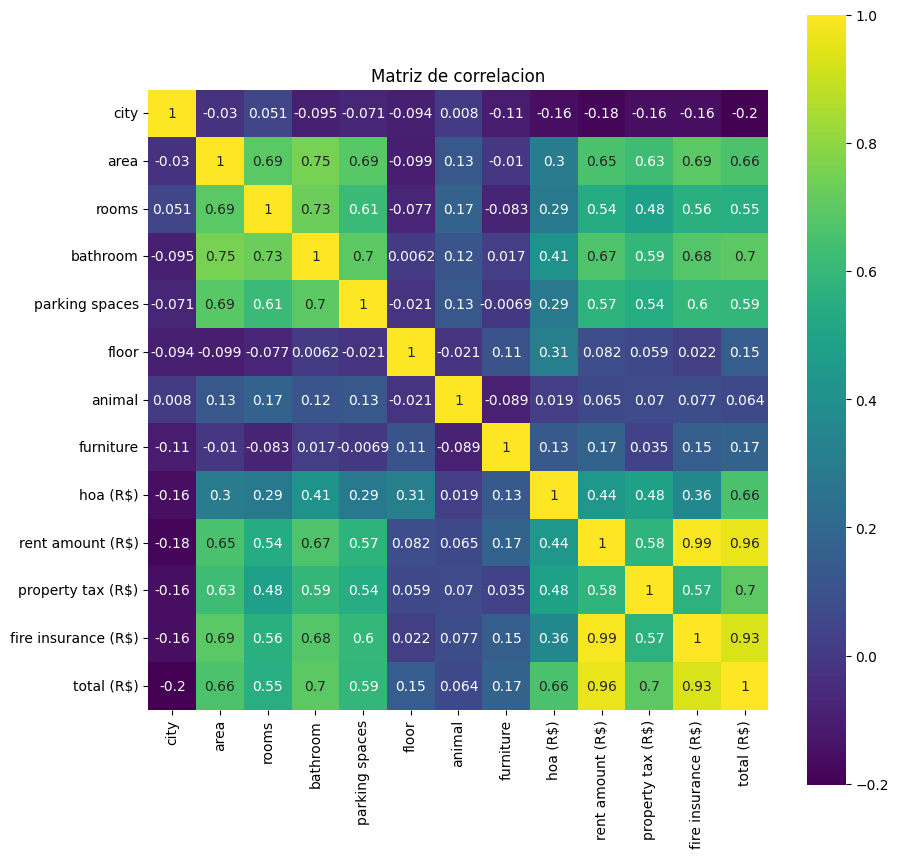

In [51]:
correlation = data.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()


Variables seleccionadas:
1. area
2. rooms
3. bathroom
4. parking spaces
5. property tax (R$)
6. fire insurance (R$)
7. city

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, BatchNormalization
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [103]:
# Seleccionar las columnas deseadas
selected_features = ['city','area', 'rooms', 'bathroom','furniture', 'fire insurance (R$)']
X = data[selected_features].values
y = data['rent amount (R$)'].values  # Supongamos que 'rent amount (R$)' es tu variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Modelo RandomForestRegressor


In [105]:
rf_model = RandomForestRegressor()

# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 168880.54349801262
Mean Absolute Error: 175.96867755242766


### Calibración del modelo

In [106]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Realiza la búsqueda de hiperparámetros utilizando Grid Search y validación cruzada (por ejemplo, con 5 divisiones)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error con mejores hiperparámetros: {mae}")

c:\Users\pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error con mejores hiperparámetros: 173.72752581215855


In [114]:
input_data = {'city':[1],'area': [70], 'rooms': [2], 'bathroom': [1],'furniture': [1], 'fire insurance (R$)': [42]}
input_df = pd.DataFrame(input_data)

In [111]:
input_df

,city,area,rooms,bathroom,furniture,fire insurance (R$)
0,1,70,2,1,1,42


In [115]:
prediction = best_rf_model.predict(input_df)
print("Predicción:", prediction[0])

Predicción: 3068.8166666666666


c:\Users\pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### Guardar el modelo


In [116]:
import joblib

In [117]:
best_rf_model = grid_search.best_estimator_

#Guardar el modelo en un archivo
joblib.dump(best_rf_model, 'house_rent_model.pkl')

['house_rent_model.pkl']

### Recomendaciones


Algunas de las recomendaciones que hacemos al trabajar con este tipo de modelos y con este tipo de variables son las siguientes:

1. Exploración de Datos: Realizar una exploración exhaustiva de los datos para comprender la distribución, identificar valores atípicos y evaluar la relevancia de las variables para poder realizar un buen modelo inicial y ver los resultados esperados.
2. Optimización de Hiper Parámetros: Dedicar tiempo a la optimización de hiper parámetros utilizando técnicas como Grid Search o Random Search para mejorar el rendimiento del modelo y con esto evaluar cuales son las variables que afectan más al rendimiento del modelo.
3. Interpretación del Modelo: Utiliza las herramientas disponibles para interpretar la importancia de las características y entender cómo el modelo toma decisiones. Esto proporciona valiosos insights para usuarios no técnicos.
